In [1]:
! pip install scikit-dsp-comm
! pip install sympy

In [2]:
import sympy as sp
sp.init_printing() 
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
import scipy.fftpack as fftpack
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

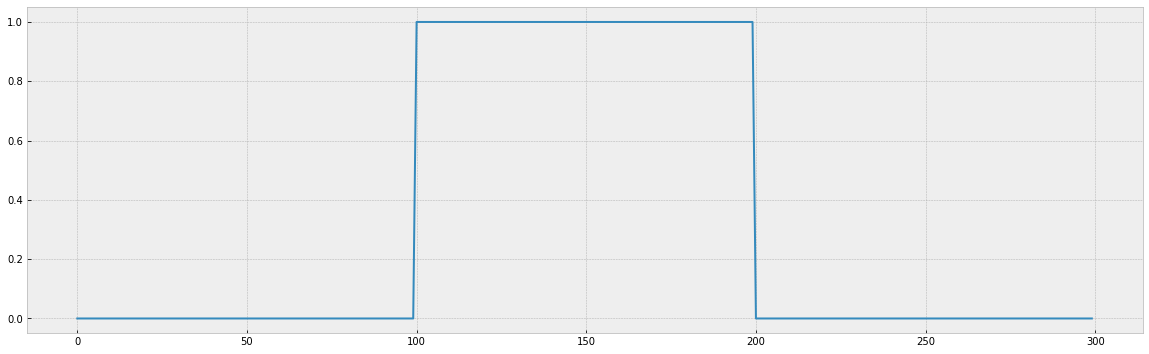

In [3]:
# a) Time-limited square pulse signal in time and frequency domains
x_rect = np.zeros(300)
x_rect[100:200] = 1

X_rect = fftpack.fft(x_rect)
plt.rcParams['figure.figsize'] = 20, 6
plt.plot(x_rect);

Square pulse is time-limited.

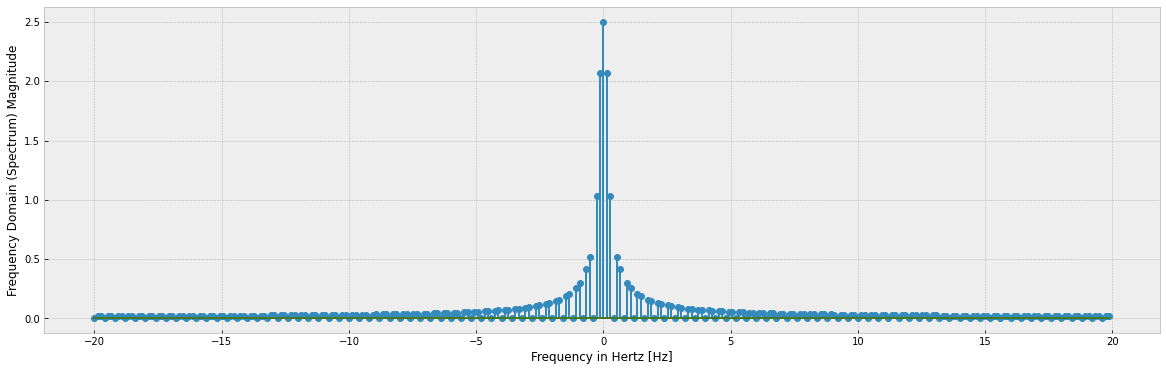

In [4]:
fp = 40
X_rect = fftpack.fft(x_rect) / fp
freqs1 = fftpack.fftfreq(len(x_rect)) * fp # number of measurements per second
fig, ax1 = plt.subplots()
ax1.stem(freqs1,  np.abs(X_rect))
ax1.set_xlabel('Frequency in Hertz [Hz]')
ax1.set_ylabel('Frequency Domain (Spectrum) Magnitude');

Square pulse is not bandlimited as seen from frequency domain.

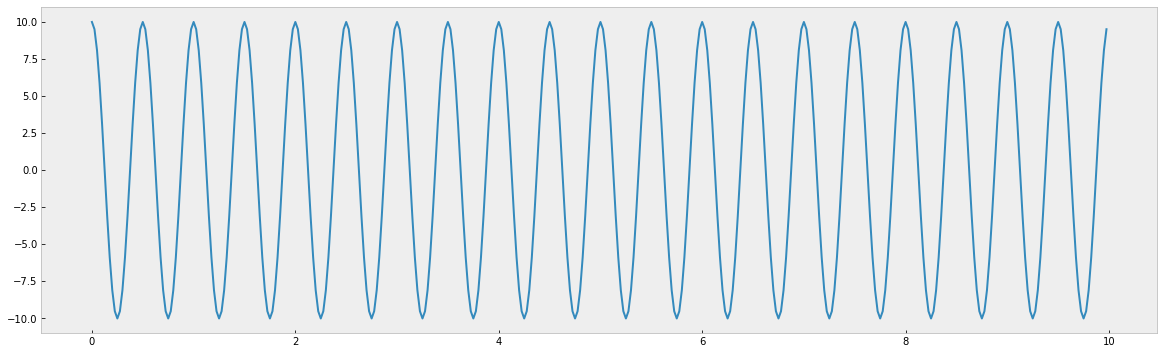

In [5]:
# b) Bandlimited sine signal in time and frequency domains

Am = 10
f_m = 2 # 2 Hz message
f_s = 40 # 40 Hz sampling
t = np.arange(0, 10, 1/f_s)
x = Am*np.cos(2*np.pi*f_m*t)

plt.rcParams['figure.figsize'] = 20, 6
plt.plot(t,x)
plt.grid()

Signal is not time-limited.

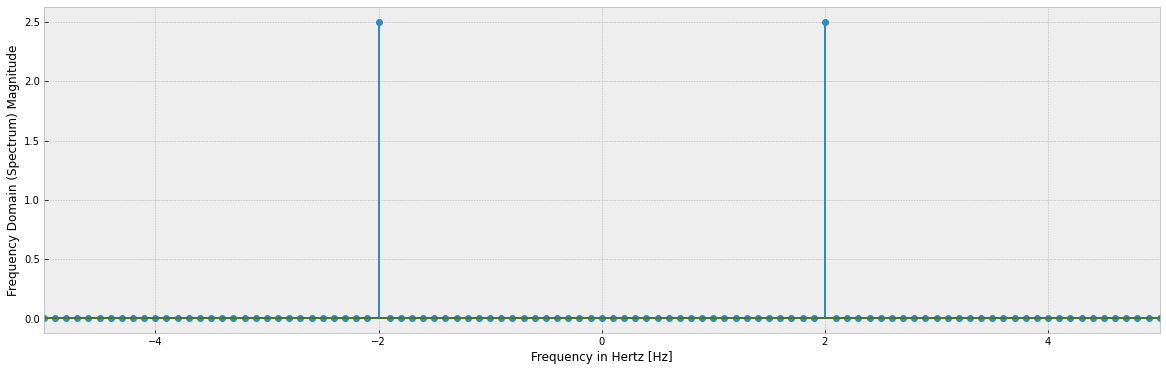

In [6]:
X = fftpack.fft(x) / fp
freqs2 = fftpack.fftfreq(len(x)) * fp # number of measurements per second
fig, ax2 = plt.subplots()
ax2.stem(freqs2, 2/fp * np.abs(X))
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_ylabel('Frequency Domain (Spectrum) Magnitude');
ax2.set_xlim(-f_m - 3, f_m + 3);

Signal is bandlimited because amplitude is 0 around specified frequency 2Hz.